In [1]:
#Importing necessary libraries & models
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Loading and viewing the dataset (.csv file)
data=pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
#Describing the dataset. Such as count, mean, standard deviation, min,.. etc.
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


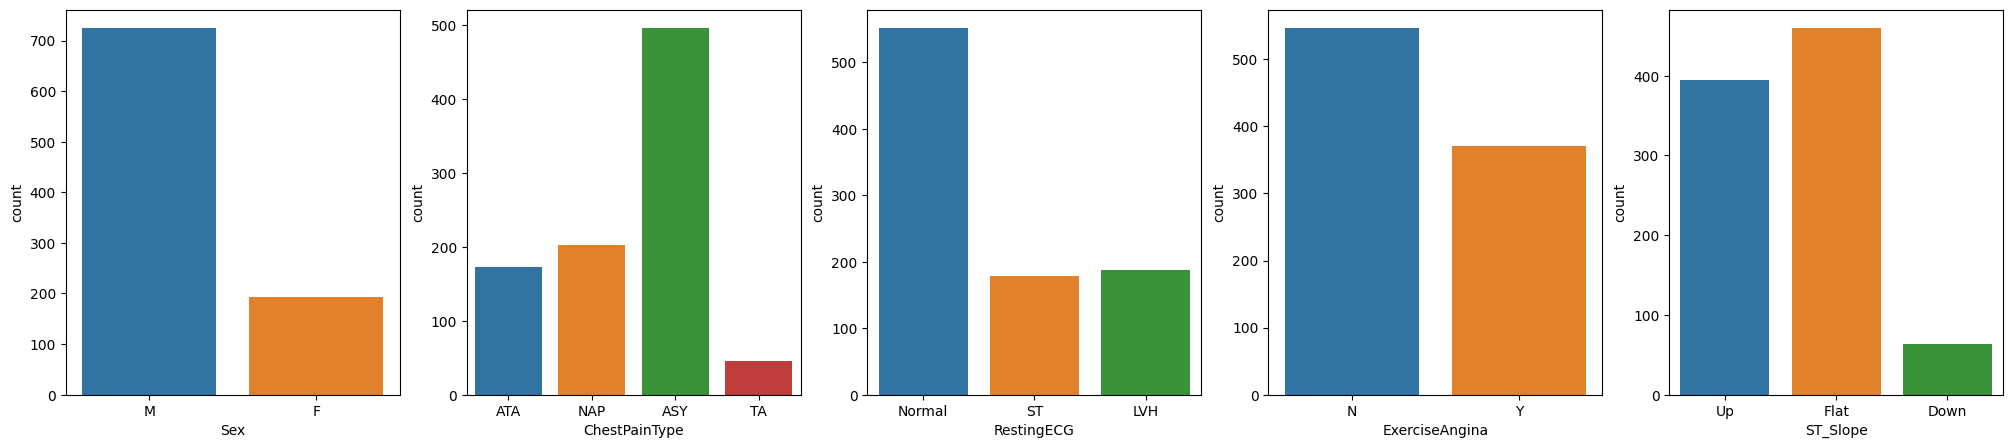

In [4]:
#Preprocessing the dataset

##It involves handling missing values, normalizing data and encoding categorical variables. 
##Techniques like scaling and ensuring that all features are in a compatible format for machine learning algorithms are applied to improve model accuracy.
colHD=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
plt.figure(figsize=(25,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  sns.countplot(x=colHD[i],data=data)

In [5]:
data[data.HeartDisease == 1]['Sex'].value_counts()

Sex
M    458
F     50
Name: count, dtype: int64

Text(0.5, 1.0, 'ChestPainType')

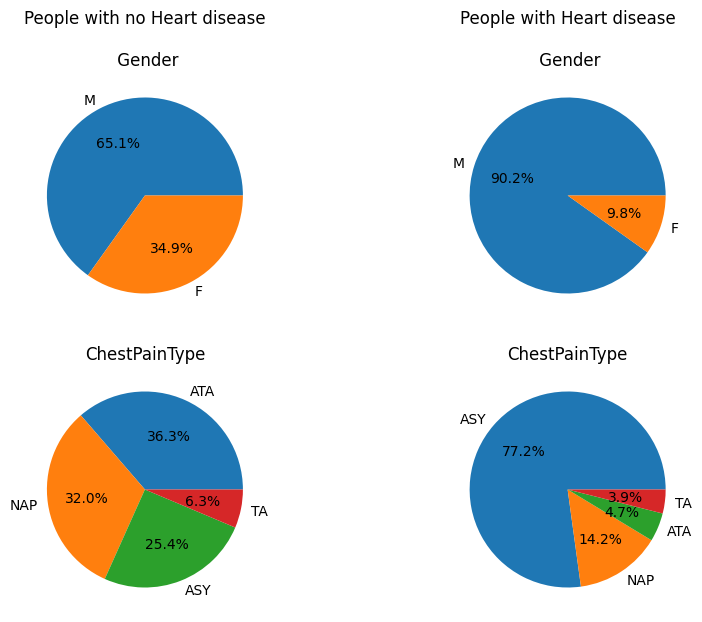

In [6]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
axs[0, 0].pie( data[data.HeartDisease == 0]['Sex'].value_counts(), labels= data[data.HeartDisease == 0]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['Sex'].value_counts(), labels= data[data.HeartDisease == 1]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n Gender")
axs[0,1].set_title("People with Heart disease\n\n Gender")
axs[1, 0].pie( data[data.HeartDisease == 0]['ChestPainType'].value_counts(), labels= data[data.HeartDisease == 0]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1, 1].pie( data[data.HeartDisease == 1]['ChestPainType'].value_counts(), labels= data[data.HeartDisease == 1]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ChestPainType")
axs[1,1].set_title("ChestPainType")

Text(0.5, 1.0, 'FastingBS')

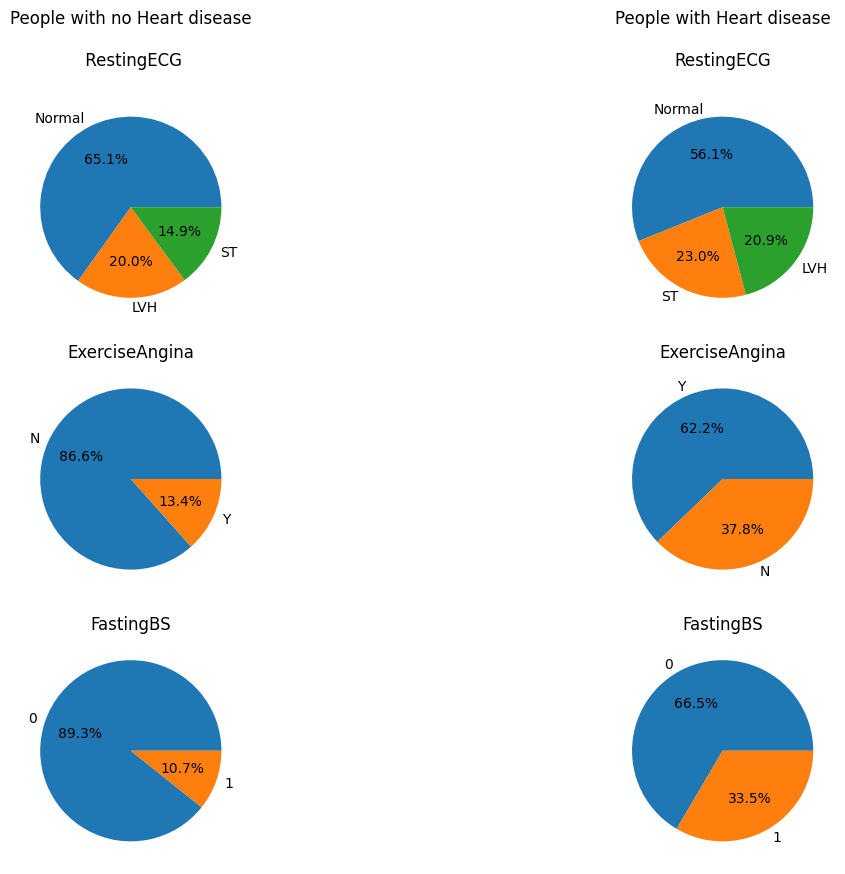

In [7]:
fig,axs = plt.subplots(3,2,figsize = (14,10))
axs[0, 0].pie( data[data.HeartDisease == 0]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 0]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 1]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n RestingECG\n")
axs[0,1].set_title("People with Heart disease\n\nRestingECG\n")
axs[1, 0].pie( data[data.HeartDisease == 0]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 0]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ExerciseAngina")
axs[1, 1].pie( data[data.HeartDisease == 1]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 1]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,1].set_title("ExerciseAngina")
axs[2, 0].pie( data[data.HeartDisease == 0]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 0]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,0].set_title("FastingBS")
axs[2, 1].pie( data[data.HeartDisease == 1]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 1]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,1].set_title("FastingBS")

<Axes: xlabel='RestingBP', ylabel='Count'>

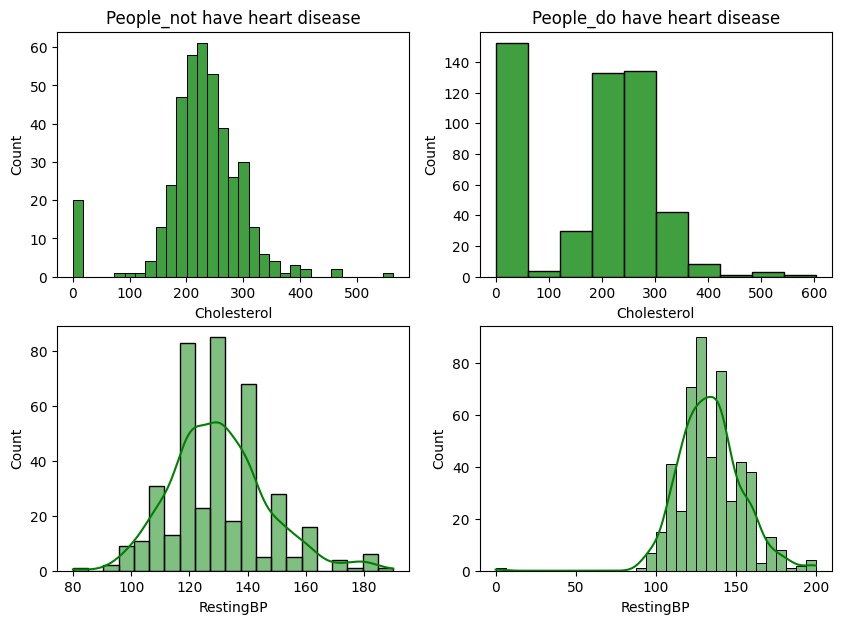

In [8]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
sns.histplot(data[data.HeartDisease ==0].Cholesterol,ax = axs[0,0],color = 'green')
axs[0,0].set_title("People_not have heart disease")
sns.histplot(data[data.HeartDisease ==1].Cholesterol,ax = axs[0,1],color = 'green')
axs[0,1].set_title("People_do have heart disease")
sns.histplot(data[data.HeartDisease ==0].RestingBP,ax = axs[1,0],kde = True,color = 'green')
sns.histplot(data[data.HeartDisease ==1].RestingBP,ax = axs[1,1],kde = True,color = 'green')

In [9]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [10]:
x=data.drop('HeartDisease', axis=1).values.reshape(-1,1)
y=data['HeartDisease'].values.reshape(-1,1)

att=['RestingBP','Cholesterol']
for i in range(len(att)):
    print(f'nl \n ',data[att[i]].nlargest(3))
    print(f'ns \n ',data[att[i]].nsmallest(3))

nl 
  241    200
365    200
399    200
Name: RestingBP, dtype: int64
ns 
  449     0
314    80
227    92
Name: RestingBP, dtype: int64
nl 
  149    603
616    564
76     529
Name: Cholesterol, dtype: int64
ns 
  293    0
294    0
295    0
Name: Cholesterol, dtype: int64


In [11]:
print(f'nl \n ',data['MaxHR'].nlargest(3))
print(f'ns \n ',data['MaxHR'].nsmallest(3))

nl 
  829    202
759    195
795    194
Name: MaxHR, dtype: int64
ns 
  390    60
370    63
402    67
Name: MaxHR, dtype: int64


In [12]:
print(data.dtypes)

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object


In [13]:
data['RestingBP'] = pd.to_numeric(data['RestingBP'], errors='coerce')
data['Cholesterol'] = pd.to_numeric(data['Cholesterol'], errors='coerce')

data['RestingBP']=data['RestingBP'].apply(lambda x: np.nan if x > 140 else x)
data['RestingBP']=data['RestingBP'].apply(lambda x: np.nan if x < 40 else x)
data['Cholesterol']=data['Cholesterol'].replace(0,np.nan)

data.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP         221
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [14]:
data['RestingBP']=data['RestingBP'].replace(np.nan,data['RestingBP'].median())
data['Cholesterol']=data['Cholesterol'].replace(np.nan,data['Cholesterol'].median())

data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
#Spliting data as train and test
x=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1, random_state = 1)

In [16]:
#Logistic Regression

##Creating & training the Logistic Regression model
LR=LogisticRegression(max_iter=320, solver='liblinear')
LR.fit(X_train,Y_train)

LogisticRegression(max_iter=320, solver='liblinear')

In [17]:
##Predicting of the test set
y_pred=LR.predict(X_test)

In [18]:
##Showing classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        37
           1       0.96      0.95      0.95        55

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



In [19]:
##Accuracy of the Logistic Regression model on the provided dataset
LR.score(x,y)

0.8507625272331155

In [20]:
##Accuracy of the Logistic Regression model by comparing actual values with predicted values
LR_Pred=metrics.accuracy_score(Y_test,y_pred)
LR_Pred

0.9456521739130435

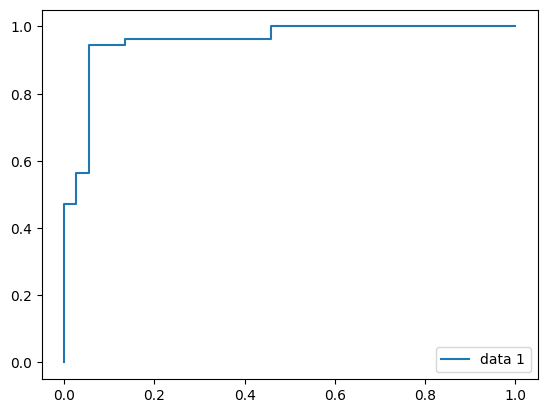

In [21]:
##Visualizing the trade-off between sensitivity (true positives) and specificity (false positives) at different thresholds
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [22]:
##Generating confusion matrix for Logistic Regression model
conf_matrix_lr = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix_lr)

Confusion Matrix:
 [[35  2]
 [ 3 52]]


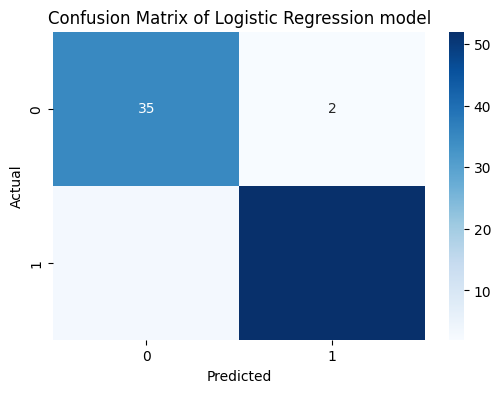

In [23]:
##Visualizing the confusion matrix of Logistic Regression model
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix of Logistic Regression model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
#Random Forest Classifier

##Creating & training the Random Forest Classifier model
RF=RandomForestClassifier(n_estimators=160,max_depth=5,random_state=110)
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=160, random_state=110)

In [25]:
##Predicting of the test set
y_pred_rf=RF.predict(X_test)

In [26]:
##Showing classification report
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.96      0.96      0.96        55

    accuracy                           0.96        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92



In [27]:
##Accuracy of the Random Forest Classifier model on the provided dataset
RF.score(x,y)

0.9106753812636166

In [28]:
##Accuracy of the Random Forest Classifier model by comparing actual values with predicted values
RF_Pred=metrics.accuracy_score(Y_test,y_pred_rf)
RF_Pred

0.9565217391304348

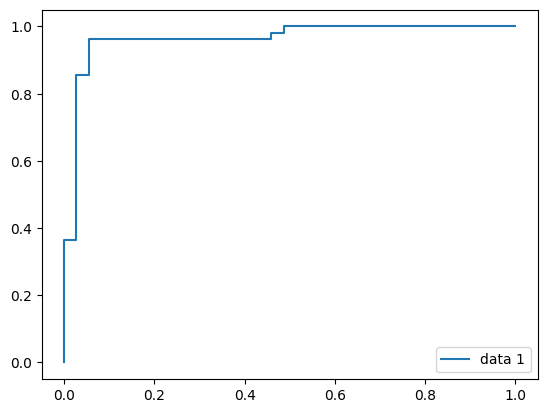

In [29]:
##Visualizing the trade-off between sensitivity (true positives) and specificity (false positives) at different thresholds
y_pred_rf_proba = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_rf_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [30]:
##Generating confusion matrix for Random Forest Classifier model
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Confusion Matrix:
 [[35  2]
 [ 2 53]]


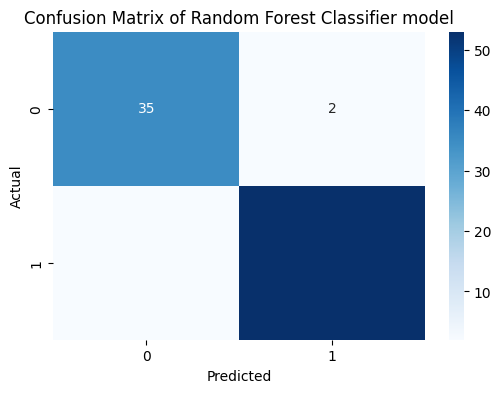

In [31]:
##Visualizing the confusion matrix of Random Forest Classifier model
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix of Random Forest Classifier model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()